In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the design style for charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Default plot size

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [196]:
# Load the dataset
df = pd.read_csv('To_be_clean.csv')

# Show the total count and the first few rows
print(f"Total Rows: {len(df)}")
df.head()

Total Rows: 10987


,image_path,text,theme,theme_num,sentiment,sentiment_num,emotion,emotion_num,dominant_colour,dominant_colour_num,...,target_audience,target_audience_num,predicted_ctr,predicted_ctr_num,likelihood_shares,likelihood_shares_num,keywords,monetary_mention,call_to_action,object_detected
0,sample_001.jpg,Fresh pepperoni pizza hot from the oven – pure...,Food,0,Positive,0,Joy,0.0,Red,0.0,...,Food Lovers,1.0,High,0.0,High,0.0,Pizza Fresh Hot,NaN,NaN,Pizza
1,sample_002.jpg,This burger was completely raw inside – could ...,Food,0,Negative,1,Anger,1.0,Red,0.0,...,General,0.0,Low,2.0,Medium,1.0,Raw Burger Dangerous,NaN,NaN,Burger
2,sample_003.jpg,The lemonade tastes exactly how I remember fro...,Food,0,Neutral,2,Trust,2.0,Yellow,6.0,...,Food Lovers,1.0,Medium,1.0,Low,2.0,Lemonade Childhood Memory,NaN,NaN,Glass
3,sample_004.jpg,Chocolate lava cake just arrived – cannot wait...,Food,0,Positive,0,Excitement,3.0,Brown,7.0,...,Food Lovers,1.0,High,0.0,High,0.0,Chocolate Lava Cake,NaN,NaN,Dessert
4,sample_005.jpg,Found mold growing inside the bread bag – thre...,Food,0,Negative,1,Fear,4.0,Brown,7.0,...,General,0.0,Low,2.0,High,0.0,Mold Bread Expired,NaN,NaN,Bread


In [197]:
# Find rows where text is repeated
# keep=False means we show ALL instances (original + copy)
duplicates = df[df.duplicated(subset=['text'], keep=False)].sort_values(by='text')

if len(duplicates) > 0:
    print(f"⚠️ Found {len(duplicates)} rows with duplicate text!")
    # Display the specific columns to check
    display(duplicates[[ 'text']])
else:
    print("✅ No text duplicates found.")

⚠️ Found 3503 rows with duplicate text!


,text
5215,529 education savings plan grows tax free for ...
2713,529 education savings plan grows tax free for ...
5951,Absolutely love my new designer handbag comple...
7051,Absolutely love my new designer handbag comple...
5351,Absolutely love my new designer handbag comple...
...,...
6473,Zipper broke on first use of supposedly premiu...
5373,Zipper broke on first use of supposedly premiu...
7073,Zipper broke on first use of supposedly premiu...
4273,Zipper broke on first use of this supposedly p...


In [198]:
df_clean = df.drop_duplicates(subset=['text'], keep='first')
print(f"Original size: {len(df)}")
print(f"Cleaned size:  {len(df_clean)}")

df = df_clean.reset_index(drop=True)



Original size: 10987
Cleaned size:  8768


In [199]:
# 1. Strip whitespace (Removes "Fashion " vs "Fashion")
df['theme'] = df['theme'].str.strip()

# 2. Optional: Make sure casing is same (e.g. "fashion" -> "Fashion")
df['theme'] = df['theme'].str.title()

# --- BETTER: Apply this to ALL text columns to be safe ---
# This loops through every text column and cleans hidden spaces
for col in df.select_dtypes(include=['object']).columns:
    if col in df.columns:
        df[col] = df[col].str.strip().str.title()

print("✅ Cleaned hidden spaces in all columns.")

✅ Cleaned hidden spaces in all columns.


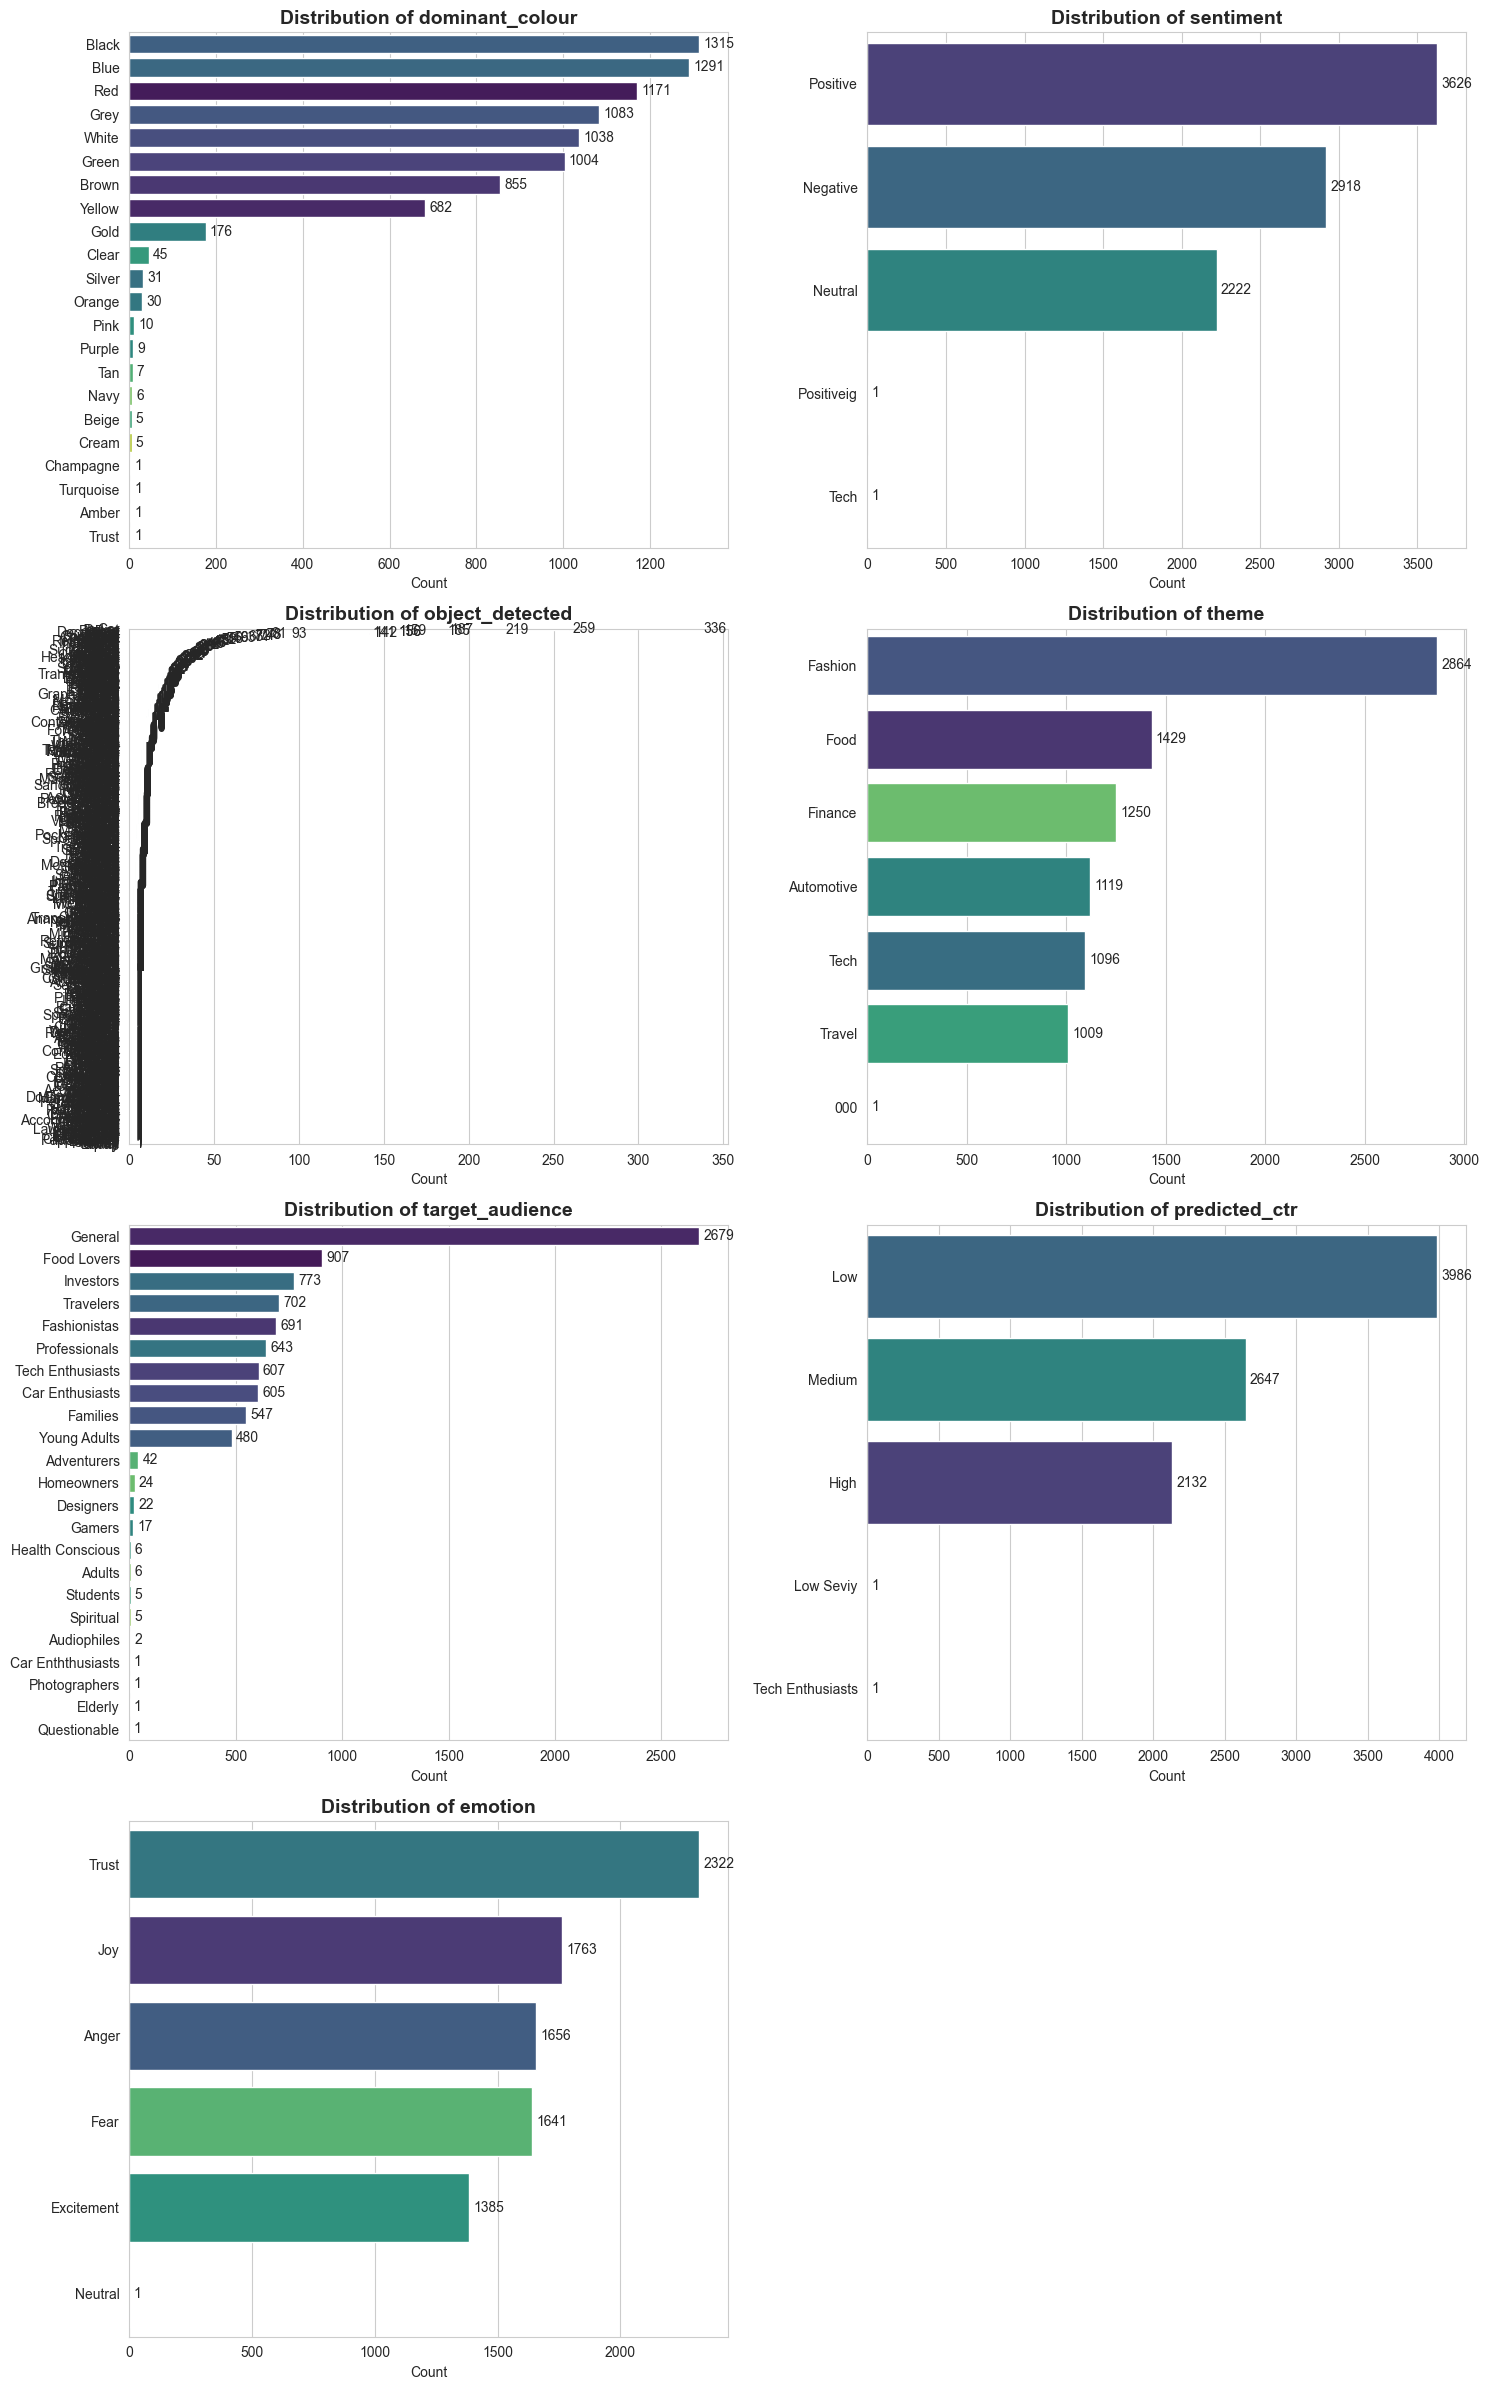

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 1. Define the columns you want to plot
cols_to_plot = [
    'dominant_colour',
    'sentiment',
    'object_detected',
    'theme',
    'target_audience',
    'predicted_ctr',
    'emotion'
]

# 2. Setup the Grid (4 rows x 2 columns)
num_plots = len(cols_to_plot)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(15, 6 * num_rows))  # Adjust height based on number of rows
sns.set_style("whitegrid")

# 3. Loop through every column and create a chart
for i, col in enumerate(cols_to_plot):
    if col in df.columns:
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Calculate value counts to sort bars by size
        order = df[col].value_counts().index
        
        # Plot Horizontal Bar Chart
        ax = sns.countplot(data=df, y=col, order=order, palette='viridis', hue=col, legend=False)
        
        # Add Title and Labels
        plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        plt.xlabel('Count')
        plt.ylabel('')
        
        # Add numbers at the end of each bar
        for container in ax.containers:
            ax.bar_label(container, padding=3)
    else:
        print(f"Skipping {col} (Not found in DataFrame)")

# 4. Final Layout Adjustments
plt.tight_layout()
plt.show()

In [201]:
# def show_rare_categories(dataframe, column_name, threshold=2):
#     # Count frequency of each value
#     counts = dataframe[column_name].value_counts()
    
#     # Find values that appear less than 'threshold' times
#     rare_values = counts[counts < threshold]
    
#     if len(rare_values) > 0:
#         print(f"\n  Rare values in '{column_name}' (Potential typos/Outliers):")
#         print(rare_values)
        
#         # Show the actual rows containing these rare values
#         rare_rows = dataframe[dataframe[column_name].isin(rare_values.index)]
#         display(rare_rows[[column_name, 'text']].head())
#     else:
#         print(f"\n✅ '{column_name}' looks clean (no extremely rare values).")

# # Check likely columns
# show_rare_categories(df, 'dominant_colour')
# show_rare_categories(df, 'sentiment')
# show_rare_categories(df, 'object_detected')
# show_rare_categories(df, 'theme')
# show_rare_categories(df, 'target_audience')
# show_rare_categories(df, 'predicted_ctr')
# show_rare_categories(df, 'emotion')


In [202]:
# ==========================================
# 1. Define the Removal Function
# ==========================================
threshold = 2 
def remove_rare_rows(dataframe, column_name, threshold):
    """
    Removes rows where the value in 'column_name' appears less than 'threshold' times.
    """
    # 1. Count how often each value appears
    counts = dataframe[column_name].value_counts()
    
    # 2. Find values that are too rare (less than threshold)
    rare_values = counts[counts < threshold].index
    
    if len(rare_values) > 0:
        # 3. Filter the dataframe to ONLY keep common values
        # "~" means NOT. So: Keep rows where column is NOT in rare_values
        original_len = len(dataframe)
        dataframe = dataframe[~dataframe[column_name].isin(rare_values)]
        
        print(f"Column '{column_name}': Dropped {original_len - len(dataframe)} rows (Removed values: {list(rare_values)})")
    else:
        print(f"Column '{column_name}': No rare outliers found.")
        
    return dataframe

# ==========================================
# 2. List of Columns to Clean
# ==========================================
cols_to_clean = [
    'dominant_colour',
    'sentiment',
    'object_detected',
    'target_audience',
    'predicted_ctr',
    'emotion'
]

# ==========================================
# 3. Apply the Function
# ==========================================
print(f"Starting Row Count: {len(df)}\n" + "-"*40)

for col in cols_to_clean:
    # Check if column exists to prevent errors
    if col in df.columns:
        df = remove_rare_rows(df, col, threshold)
    else:
        print(f"⚠️ Skipping '{col}': Column not found in dataframe.")

print("-" * 40)
print(f"Final Row Count: {len(df)}")

Starting Row Count: 8768
----------------------------------------
Column 'dominant_colour': Dropped 4 rows (Removed values: ['Champagne', 'Turquoise', 'Amber', 'Trust'])
Column 'sentiment': Dropped 1 rows (Removed values: ['Positiveig'])
Column 'object_detected': Dropped 354 rows (Removed values: ['Welder', 'Cost', 'Bandana', 'Pos', 'Horse', 'Tape', 'Monitoring', 'Smart Home', 'Reservation', 'Waste', 'Scheduling', 'Eclair', 'Vr Headset', 'Description', 'Children', 'Graphics Card', 'Meter', 'Feedback', 'Concept Car', 'Visor', 'Collider', 'Fuel Tank', 'Roof', 'Lashes', 'Price Tag', 'Umbrella', 'Carton', 'Safety Test', 'Romper', 'Veil', 'Pullover', 'Pillowcase', 'Mask', 'Cruise Ship', 'Throw', 'Tunic', 'Bodysuit', 'Kaftan', 'Size Tag', 'Sports Car', 'Pin', 'Trainer', 'Hall', 'Satellite', 'Deck', 'Classroom', 'Onion', 'Remote', 'Rolls', 'Portion', 'Burrito', 'Parachute', 'Ferry', 'Waffle', 'Jar', 'Strawberry', 'Kebab', 'Endive', 'Spanakopita', 'Steamer', 'Concept', 'Falafel', 'Form', 'Dive

In [203]:
# ==========================================
# 1. Define the Removal Function
# ==========================================
threshold = 250 
def remove_rare_rows(dataframe, column_name, threshold):
    """
    Removes rows where the value in 'column_name' appears less than 'threshold' times.
    """
    # 1. Count how often each value appears
    counts = dataframe[column_name].value_counts()
    
    # 2. Find values that are too rare (less than threshold)
    rare_values = counts[counts < threshold].index
    
    if len(rare_values) > 0:
        # 3. Filter the dataframe to ONLY keep common values
        # "~" means NOT. So: Keep rows where column is NOT in rare_values
        original_len = len(dataframe)
        dataframe = dataframe[~dataframe[column_name].isin(rare_values)]
        
        print(f"Column '{column_name}': Dropped {original_len - len(dataframe)} rows (Removed values: {list(rare_values)})")
    else:
        print(f"Column '{column_name}': No rare outliers found.")
        
    return dataframe

# ==========================================
# 2. List of Columns to Clean
# ==========================================
cols_to_clean = [
    'dominant_colour',
    'target_audience',

]

# ==========================================
# 3. Apply the Function
# ==========================================
print(f"Starting Row Count: {len(df)}\n" + "-"*40)

for col in cols_to_clean:
    # Check if column exists to prevent errors
    if col in df.columns:
        df = remove_rare_rows(df, col, threshold)
    else:
        print(f"⚠️ Skipping '{col}': Column not found in dataframe.")

print("-" * 40)
print(f"Final Row Count: {len(df)}")

Starting Row Count: 8406
----------------------------------------
Column 'dominant_colour': Dropped 308 rows (Removed values: ['Gold', 'Clear', 'Silver', 'Orange', 'Purple', 'Pink', 'Tan', 'Navy', 'Beige', 'Cream'])
Column 'target_audience': Dropped 112 rows (Removed values: ['Adventurers', 'Homeowners', 'Gamers', 'Designers', 'Health Conscious', 'Adults', 'Students', 'Spiritual', 'Audiophiles'])
----------------------------------------
Final Row Count: 7986


In [204]:
# 1. Find the indices (row numbers) where theme is 'Fashion'
fashion_indices = df[df['theme'] == 'Fashion'].index

# 2. Select the first 1000 indices
# (Note: If there are fewer than 1000, it will just drop all of them)
indices_to_drop = fashion_indices[:1500]

print(f"Total 'Fashion' rows found: {len(fashion_indices)}")
print(f"Dropping: {len(indices_to_drop)} rows...")

# 3. Drop specific rows by index
df = df.drop(indices_to_drop)

# 4. Verify the result
print("-" * 30)
print(f"Remaining 'Fashion' rows: {len(df[df['theme'] == 'Fashion'])}")
print(f"New Total Dataset Size: {len(df)}")

Total 'Fashion' rows found: 2771
Dropping: 1500 rows...
------------------------------
Remaining 'Fashion' rows: 1271
New Total Dataset Size: 6486


In [205]:
import pandas as pd
limit = len(df) // 8

def distribute_excess_data(dataframe, column_name, limit):
    print(f"--- Redistributing '{column_name}' to limit: {limit} ---")
    
    # 1. Separate the data into "Kept" and "Excess"
    kept_rows = []
    excess_rows = pd.DataFrame()
    
    unique_cats = dataframe[column_name].unique()
    
    for category in unique_cats:
        subset = dataframe[dataframe[column_name] == category]
        
        if len(subset) > limit:
            # If over limit: Keep 'limit', move rest to excess pool
            kept_rows.append(subset.iloc[:limit])
            excess_rows = pd.concat([excess_rows, subset.iloc[limit:]])
        else:
            # If under limit: Keep everything
            kept_rows.append(subset)
            
    # Combine the kept rows back into a dataframe
    df_new = pd.concat(kept_rows).reset_index(drop=True)
    
    print(f"Collected {len(excess_rows)} excess rows to redistribute...")
    
    # 2. Fill the under-filled categories using the excess pool
    if len(excess_rows) > 0:
        counts = df_new[column_name].value_counts()
        underfilled_cats = counts[counts < limit].index
        
        current_excess_idx = 0
        
        for cat in underfilled_cats:
            # Calculate how many we need
            current_count = len(df_new[df_new[column_name] == cat])
            needed = limit - current_count
            
            # Calculate how many we can actually give
            available = len(excess_rows) - current_excess_idx
            to_take = min(needed, available)
            
            if to_take > 0:
                # Grab a chunk from the excess pool
                chunk = excess_rows.iloc[current_excess_idx : current_excess_idx + to_take].copy()
                
                # !!! THIS IS THE MAGIC STEP !!!
                # We overwrite the old color with the new color
                chunk[column_name] = cat
                
                # Add to the main dataframe
                df_new = pd.concat([df_new, chunk])
                
                current_excess_idx += to_take
                
            if current_excess_idx >= len(excess_rows):
                break # We ran out of extra rows
    
    return df_new.reset_index(drop=True)

# ==========================================
# Apply the Logic
# ==========================================

# 1. Check before
print("BEFORE:")
print(df['dominant_colour'].value_counts())

# 2. Apply redistribution (Change 500 to your desired limit)
df = distribute_excess_data(df, 'dominant_colour', limit)

# 3. Check after
print("\nAFTER:")
print(df['dominant_colour'].value_counts())

BEFORE:
dominant_colour
Blue      1024
Black     1014
Red        938
Green      830
Grey       803
White      785
Brown      566
Yellow     525
Name: count, dtype: int64
--- Redistributing 'dominant_colour' to limit: 810 ---
Collected 566 excess rows to redistribute...

AFTER:
dominant_colour
Red       810
Yellow    810
Brown     810
Green     810
White     810
Grey      810
Black     810
Blue      810
Name: count, dtype: int64


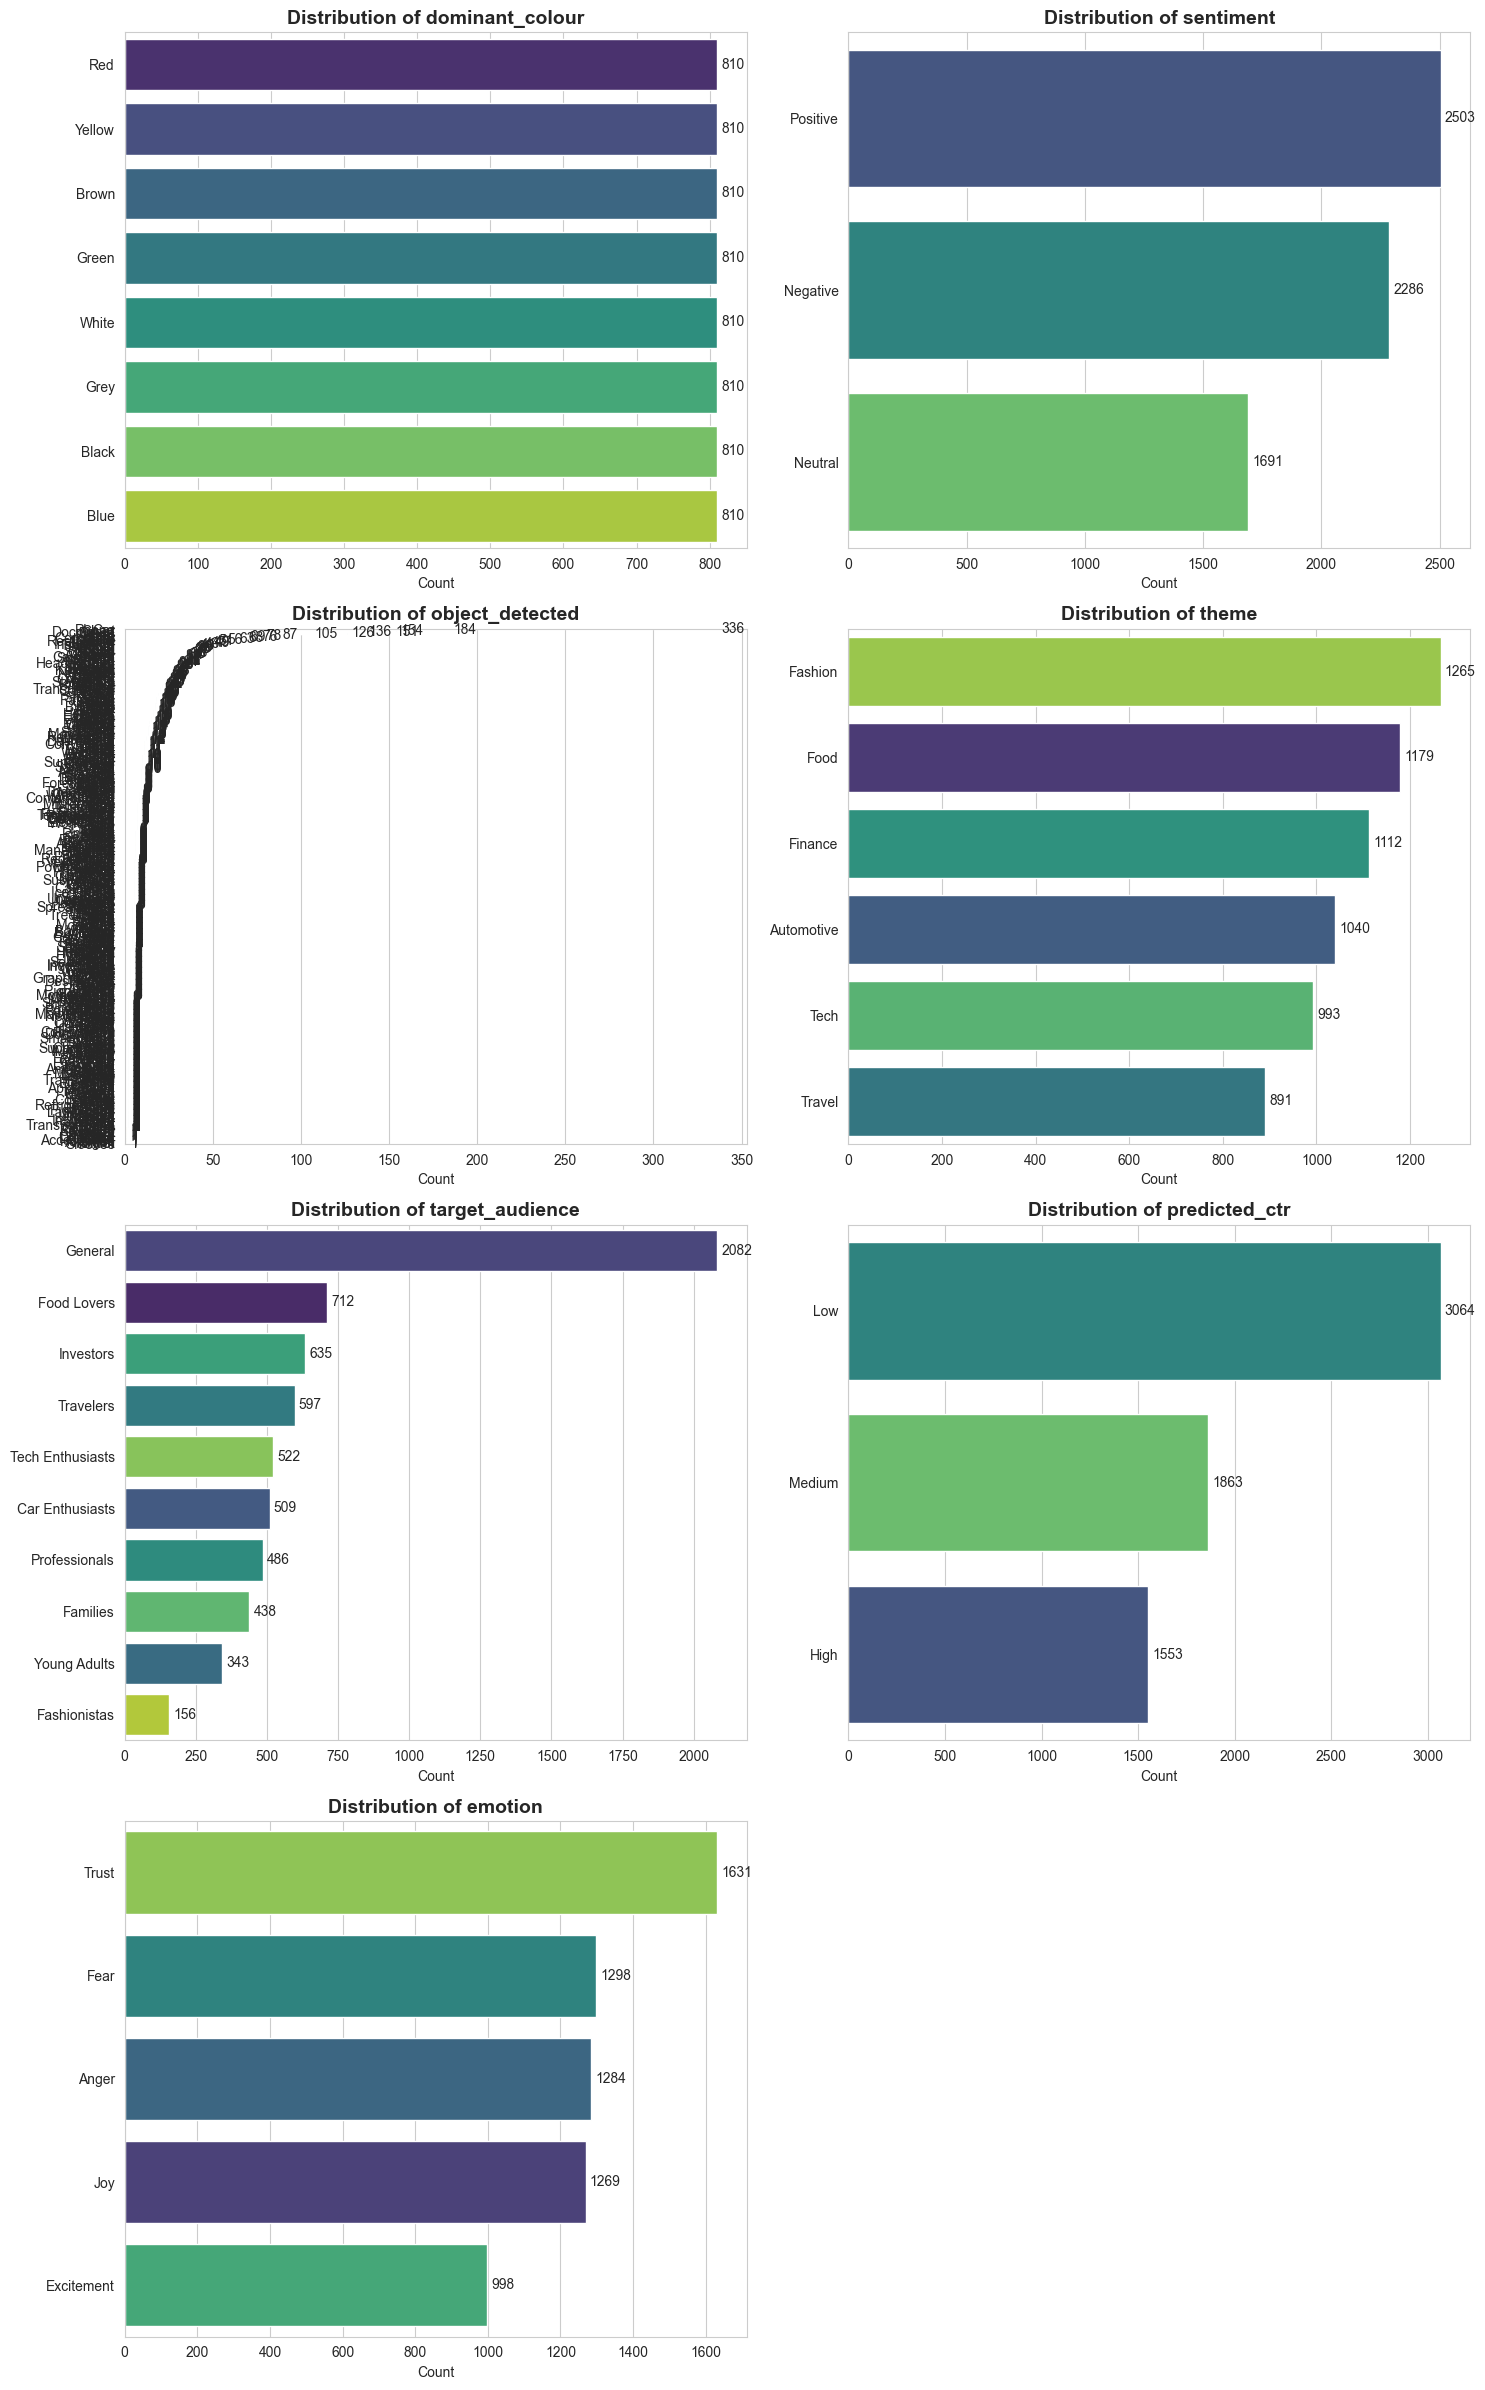

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 1. Define the columns you want to plot
cols_to_plot = [
    'dominant_colour',
    'sentiment',
    'object_detected',
    'theme',
    'target_audience',
    'predicted_ctr',
    'emotion'
]

# 2. Setup the Grid (4 rows x 2 columns)
num_plots = len(cols_to_plot)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(15, 6 * num_rows))  # Adjust height based on number of rows
sns.set_style("whitegrid")

# 3. Loop through every column and create a chart
for i, col in enumerate(cols_to_plot):
    if col in df.columns:
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Calculate value counts to sort bars by size
        order = df[col].value_counts().index
        
        # Plot Horizontal Bar Chart
        ax = sns.countplot(data=df, y=col, order=order, palette='viridis', hue=col, legend=False)
        
        # Add Title and Labels
        plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        plt.xlabel('Count')
        plt.ylabel('')
        
        # Add numbers at the end of each bar
        for container in ax.containers:
            ax.bar_label(container, padding=3)
    else:
        print(f"Skipping {col} (Not found in DataFrame)")

# 4. Final Layout Adjustments
plt.tight_layout()
plt.show()

In [ ]:
from pathlib import Path
dir = Path.cwd().parent
print(dir)
save_dir = dir
df.to_csv(save_dir / 'main.csv', index=False)
print(f"Saved to: {save_dir / 'main.csv'}")